# Импорт библиотек

In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [86]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Загрузка данных

In [87]:
PATH = '/content/drive/MyDrive/Colab Notebooks/ПМ-2022/АД/data/Mall_Customers.csv'
df = pd.read_csv(PATH)
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Подготовка данных

In [88]:
df.Genre.value_counts()

,count
Genre,
Female,112
Male,88


In [89]:
df['Genre'] = (df['Genre'] == "Female").astype(int)

In [90]:
df.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [91]:
df.rename(columns = {'Annual Income (k$)':'income', 'Spending Score (1-100)': 'spending', 'Genre': 'sex', 'Age': 'age'}, inplace=True)

In [92]:
tmp = df[(df['income']>40) & (df['income']<70)]
tmp.shape

(74, 5)

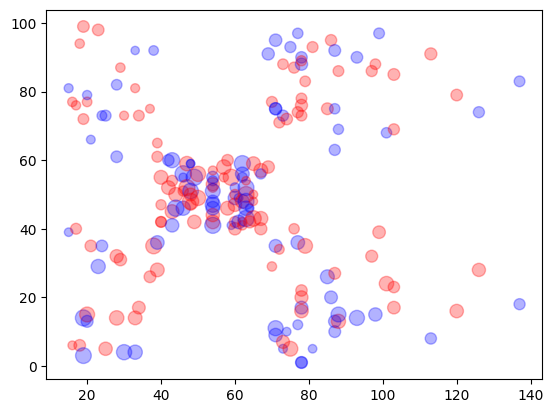

In [93]:
colors = ['blue', 'red']
plt.scatter(x='income', y='spending', data=df, c=df['sex'].apply(lambda x: colors[x]), s=df['age']*2, alpha=0.3)

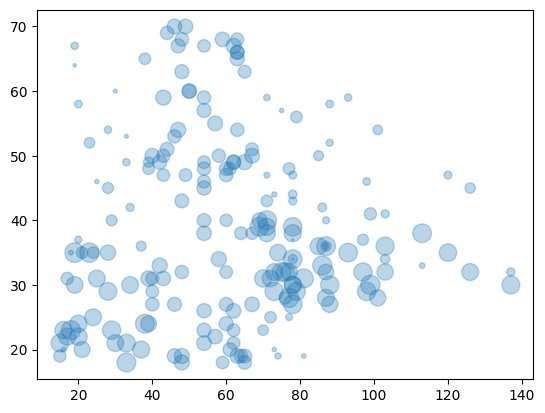

In [94]:
colors = ['blue', 'red']
plt.scatter(x='income', y='age', data=df, s=df['spending']*2, alpha=0.3)

In [95]:
df.head()

,CustomerID,sex,age,income,spending
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   CustomerID  200 non-null    int64
 1   sex         200 non-null    int64
 2   age         200 non-null    int64
 3   income      200 non-null    int64
 4   spending    200 non-null    int64
dtypes: int64(5)
memory usage: 7.9 KB


# Дерево решений из коробки (sklearn)

In [97]:
df.columns

Index(['CustomerID', 'sex', 'age', 'income', 'spending'], dtype='object')

In [98]:
X = df[['sex', 'age', 'income']]
y = df['spending']

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [100]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)
y_pred = dtr.predict(X_test)

In [101]:
mean_squared_error(y_test, y_pred)

759.425

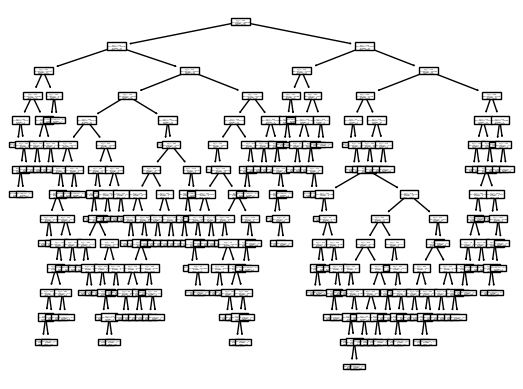

In [102]:
tree.plot_tree(dtr);

In [103]:
treeObj = dtr.tree_
print(treeObj.max_depth)

14


In [104]:
dtr2 = DecisionTreeRegressor(max_depth=3)
dtr2.fit(X_train, y_train)
y_pred2 = dtr2.predict(X_test)

In [105]:
mean_squared_error(y_test, y_pred2)

556.7746042701344

[Text(0.5, 0.875, 'x[1] <= 39.5\nsquared_error = 658.648\nsamples = 160\nvalue = 51.144'),
 Text(0.25, 0.625, 'x[1] <= 20.5\nsquared_error = 664.09\nsamples = 91\nvalue = 62.231'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'x[2] <= 69.0\nsquared_error = 534.793\nsamples = 11\nvalue = 47.545'),
 Text(0.0625, 0.125, 'squared_error = 216.691\nsamples = 9\nvalue = 56.444'),
 Text(0.1875, 0.125, 'squared_error = 6.25\nsamples = 2\nvalue = 7.5'),
 Text(0.375, 0.375, 'x[1] <= 32.5\nsquared_error = 648.137\nsamples = 80\nvalue = 64.25'),
 Text(0.3125, 0.125, 'squared_error = 349.51\nsamples = 49\nvalue = 69.286'),
 Text(0.4375, 0.125, 'squared_error = 1016.722\nsamples = 31\nvalue = 56.29'),
 Text(0.75, 0.625, 'x[2] <= 36.0\nsquared_error = 275.554\nsamples = 69\nvalue = 36.522'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'x[1] <= 45.5\nsquared_error = 112.017\nsamples = 11\nvalue = 15.273'),
 Text(0.5625, 0.125, 'squared_error = 46.889\nsamples = 3\nvalue = 26.667'),
 Text(0.

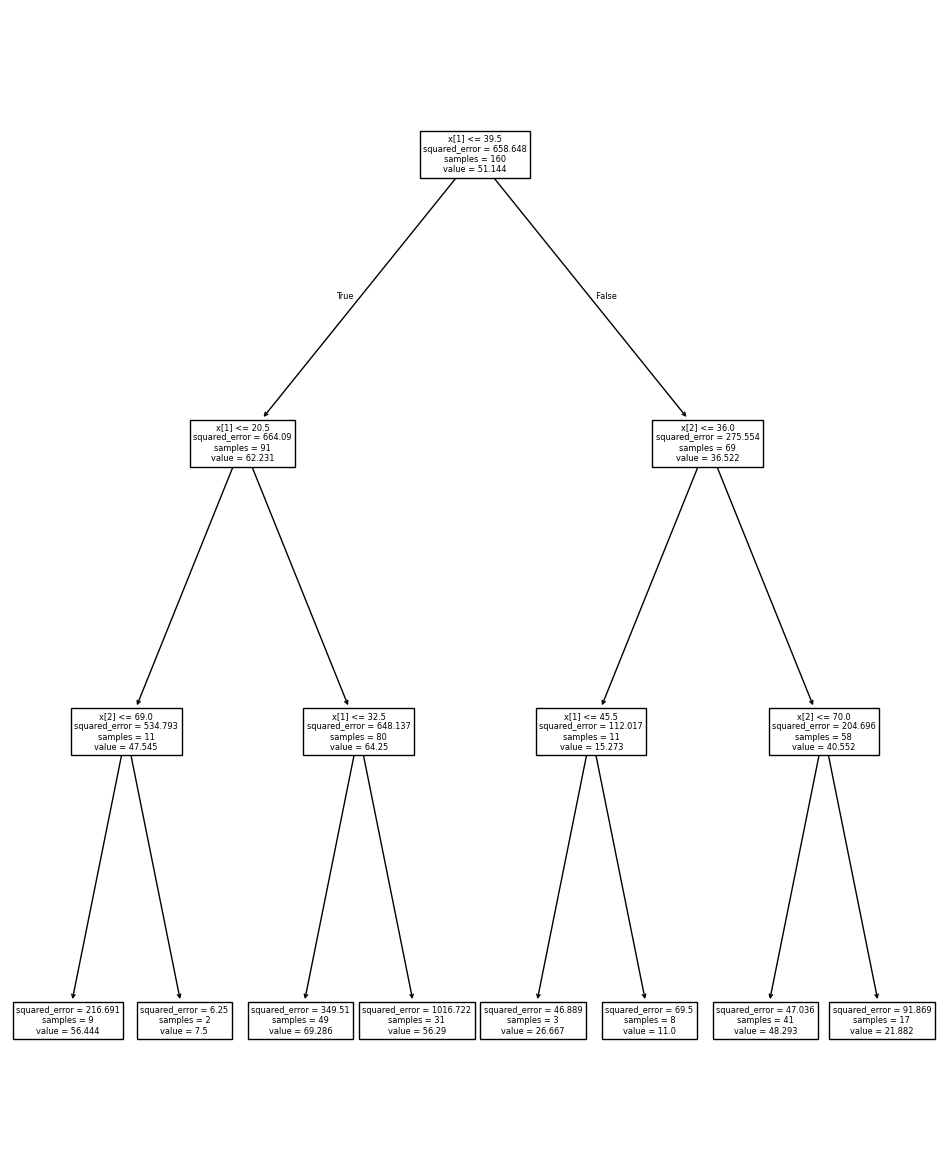

In [143]:
plt.figure(figsize=(12,15))
tree.plot_tree(dtr2)

In [107]:
treeObj = dtr2.tree_
print(treeObj.max_depth)

3


In [ ]:
# Напишем вспомогательную функцию, которая будет возвращать решетку для дальнейшей визуализации.
def get_grid(data):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    return np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# немного кода для отображения разделяющей поверхности
#xx, yy = get_grid(X_train)
xx, yy = np.meshgrid(np.arange(0, 100, 0.01), np.arange(0, 100, 0.01))
plt.pcolormesh(xx, yy, y_pred2, cmap='autumn')
plt.scatter(X_train[:, 1], X_train[:, 2], s=100,
cmap='autumn', edgecolors='black', linewidth=1.5);

# Дерево решений ручками

In [137]:
def entropy(data):
    return mean_squared_error(data, [data.mean()]*data.shape[0])

def entropy_cond(data, cond):
    left = data[cond]
    right = data[~cond]
    return entropy(data['spending']) - left.shape[0]/data.shape[0] * entropy(left['spending'])  - right.shape[0]/data.shape[0] * entropy(right['spending'])

In [156]:
def best_predicate(data):
    best_feature = None
    best_threshold = None
    max_entropy = 0

    for f in data.columns[1:-1]:
        unique_values = sorted(data[f].unique())
        for i in range(len(unique_values)-1):
            th = (unique_values[i] + unique_values[i+1]) / 2
            entr = entropy_cond(data, data[f] <= th)
            if entr > max_entropy:
                max_entropy = entr
                best_feature = f
                best_threshold = th

    return (best_feature, best_threshold)

In [161]:
#feature, threshold, left_subtree, right_subtree
dict_tree = {0: [None, None, None, None]}
def build_tree(data, owner=0, level=0, max_depth=3):
    if level <= max_depth:
        feature, threshold = best_predicate(data)
        if feature:
            print(level, feature, threshold)
            build_tree(data[data[feature] <= threshold], 2 * owner + 1, level+1)
            build_tree(data[data[feature] > threshold], 2 * owner + 2, level+1)
            dict_tree[owner] = [feature, threshold, 2 * owner + 1, 2 * owner + 2]

In [162]:
tmp = X_train[['sex', 'age', 'income']]
tmp['spending'] = y_train
build_tree(tmp)
dict_tree

<ipython-input-162-696b4acbb4a4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp['spending'] = y_train


0 age 39.5
1 age 20.5
2 income 69.0
3 income 54.5
3 age 19.5
2 age 32.5
3 income 72.5
3 age 37.5
1 income 36.0
2 age 45.5
3 income 31.5
3 age 59.0
2 income 70.0
3 income 40.5
3 age 56.5


{0: ['age', 39.5, 1, 2],
 7: ['income', 54.5, 15, 16],
 8: ['age', 19.5, 17, 18],
 3: ['income', 69.0, 7, 8],
 9: ['income', 72.5, 19, 20],
 10: ['age', 37.5, 21, 22],
 4: ['age', 32.5, 9, 10],
 1: ['age', 20.5, 3, 4],
 11: ['income', 31.5, 23, 24],
 12: ['age', 59.0, 25, 26],
 5: ['age', 45.5, 11, 12],
 13: ['income', 40.5, 27, 28],
 14: ['age', 56.5, 29, 30],
 6: ['income', 70.0, 13, 14],
 2: ['income', 36.0, 5, 6]}

In [147]:
tmp.columns

Index(['sex', 'age', 'income', 'sending', 'spending'], dtype='object')

[Text(0.5, 0.875, 'x[1] <= 39.5\nsquared_error = 658.648\nsamples = 160\nvalue = 51.144'),

 Text(0.25, 0.625, 'x[1] <= 20.5\nsquared_error = 664.09\nsamples = 91\nvalue = 62.231'),

 Text(0.375, 0.75, 'True  '),

 Text(0.125, 0.375, 'x[2] <= 69.0\nsquared_error = 534.793\nsamples = 11\nvalue = 47.545'),

 Text(0.0625, 0.125, 'squared_error = 216.691\nsamples = 9\nvalue = 56.444'),

 Text(0.1875, 0.125, 'squared_error = 6.25\nsamples = 2\nvalue = 7.5'),

 Text(0.375, 0.375, 'x[1] <= 32.5\nsquared_error = 648.137\nsamples = 80\nvalue = 64.25'),

 Text(0.3125, 0.125, 'squared_error = 349.51\nsamples = 49\nvalue = 69.286'),
 Text(0.4375, 0.125, 'squared_error = 1016.722\nsamples = 31\nvalue = 56.29'),
 Text(0.75, 0.625, 'x[2] <= 36.0\nsquared_error = 275.554\nsamples = 69\nvalue = 36.522'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'x[1] <= 45.5\nsquared_error = 112.017\nsamples = 11\nvalue = 15.273'),
 Text(0.5625, 0.125, 'squared_error = 46.889\nsamples = 3\nvalue = 26.667'),
 Text(0.6875, 0.125, 'squared_error = 69.5\nsamples = 8\nvalue = 11.0'),

In [122]:
df.columns[1:-1]

Index(['sex', 'age', 'income'], dtype='object')

In [112]:
entropy_cond(df, df['age'] < 60)

5.759999999999955